In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# Define a custom converter function to handle percentage values
def percent_to_float(x):
    return float(x.strip('%')) / 100

# Define the columns that need to be converted using the custom function
percent_columns = ['I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate', 'Overall cache miss rate', 'Data cache miss rate', 'Weighted Miss Rate']

# Create a dictionary for converters
converters = {col: percent_to_float for col in percent_columns}

# Read the CSV data using pandas
data = pd.read_csv("get_experiment_mac.csv", thousands=',', converters=converters)


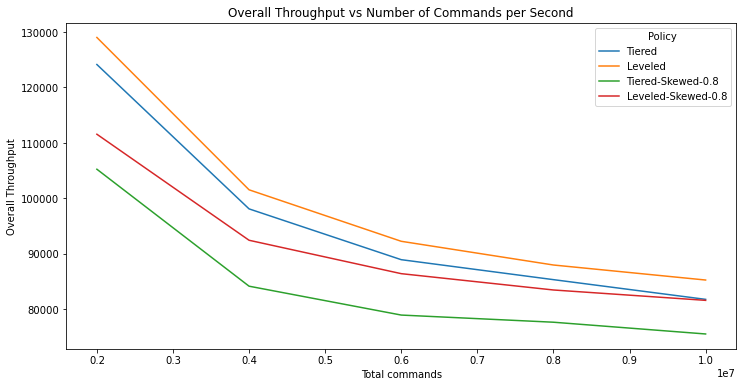

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Total commands", y="Overall Throughput", hue="Policy", palette="tab10")
plt.title("Overall Throughput vs Number of Commands per Second")
plt.legend(title="Policy")
plt.show()

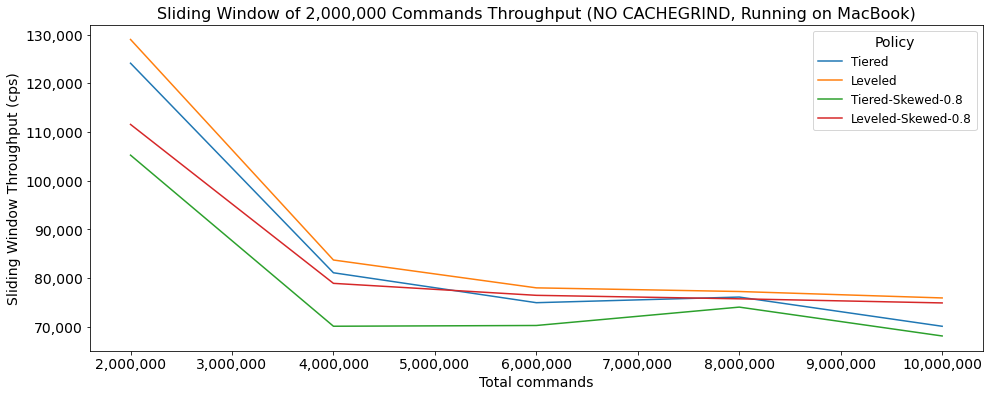

In [20]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(16, 6))
sns.lineplot(data=data, x="Total commands", y="Sliding Window Throughput", hue="Policy", palette="tab10")
plt.title("Sliding Window of 2,000,000 Commands Throughput (NO CACHEGRIND, Running on MacBook)")
plt.ylabel("Sliding Window Throughput (cps)")
plt.legend(title="Policy")
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.titlesize': 16, 'legend.fontsize': 12})

# Format x-axis and y-axis without scientific notation and with commas
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


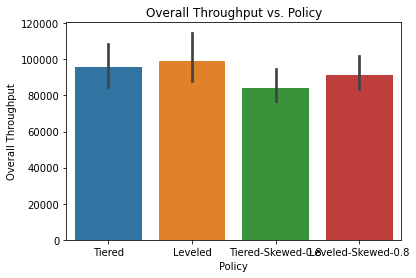

In [4]:
sns.barplot(x='Policy', y='Overall Throughput', data=data)
plt.title('Overall Throughput vs. Policy')
plt.show()


In [6]:
sns.barplot(x='Policy', y='Overall cache miss rate', data=data)
plt.title('Overall Cache Miss Rate vs. Policy')
plt.show()


ValueError: Could not interpret input 'Overall cache miss rate'

In [7]:
sns.barplot(x='Policy', y='Weighted Miss Rate', data=data)
plt.title('Weighted Miss Rate vs. Policy')
plt.show()


ValueError: Could not interpret input 'Weighted Miss Rate'

In [ ]:
sns.barplot(x='Policy', y='Overall I/O', data=data)
plt.title('Overall I/O vs. Policy')
plt.show()


In [ ]:
# Prepare data for heatmap
heatmap_data = data[['Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]
heatmap_data = heatmap_data.set_index('Policy')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title('Cache Miss Rates at Different Levels')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data = data[['Total commands', 'Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]

# Plot I1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='I1 miss rate', hue='Policy', marker='o')
plt.title('I1 Miss Rate vs. Total Commands')
plt.ylabel('I1 Miss Rate')
plt.show()

# Plot LLi miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLi miss rate', hue='Policy', marker='o')
plt.title('LLi Miss Rate vs. Total Commands')
plt.ylabel('LLi Miss Rate')
plt.show()

# Plot D1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='D1 miss rate', hue='Policy', marker='o')
plt.title('D1 Miss Rate vs. Total Commands')
plt.ylabel('D1 Miss Rate')
plt.show()

# Plot LLd miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLd miss rate', hue='Policy', marker='o')
plt.title('LLd Miss Rate vs. Total Commands')
plt.ylabel('LLd Miss Rate')
plt.show()

# Plot LL miss rate
sns.lineplot(data=line_data, x='Total commands', y='LL miss rate', hue='Policy', marker='o')
plt.title('LL Miss Rate vs. Total Commands')
plt.ylabel('LL Miss Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data_overall = data[['Total commands', 'Policy', 'Overall cache miss rate', 'Overall Throughput']]

# Plot Overall Cache Miss Rate
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall cache miss rate', hue='Policy', marker='o')
plt.title('Overall Cache Miss Rate vs. Total Commands')
plt.ylabel('Overall Cache Miss Rate')
plt.show()

# Plot Overall Throughput
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall Throughput', hue='Policy', marker='o')
plt.title('Overall Throughput vs. Total Commands')
plt.ylabel('Overall Throughput')
plt.show()